## How to Train YOLOv8 Object Detection on a Custom Dataset

In [1]:
!nvidia-smi

Wed Apr 17 10:17:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics==8.0.196

## Install YOLOv8

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.30GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.25.2>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.1+cu121>=1.8.0
torchvision         ✅ 0.17.1+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


## Train YOLOv8 Model on Custom Dataset

In [4]:
!pip install roboflow

In [6]:
# set up environment
import os
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eSzt9jqUwL3SzdHp0dmr")
project = rf.workspace("jaishreeram").project("violence_maksad")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/violence_maksad-3 in yolov8:: 100%|██████████| 31761/31761 [00:05<00:00, 5973.04it/s]


In [8]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/datasets/violence_maksad-3/data.yaml epochs=50 imgsz=340

100% 6.23M/6.23M [00:00<00:00, 62.5MB/s]
New https://pypi.org/project/ultralytics/8.2.0 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/violence_maksad-3/data.yaml, epochs=50, patience=50, batch=16, imgsz=340, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=

In [9]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

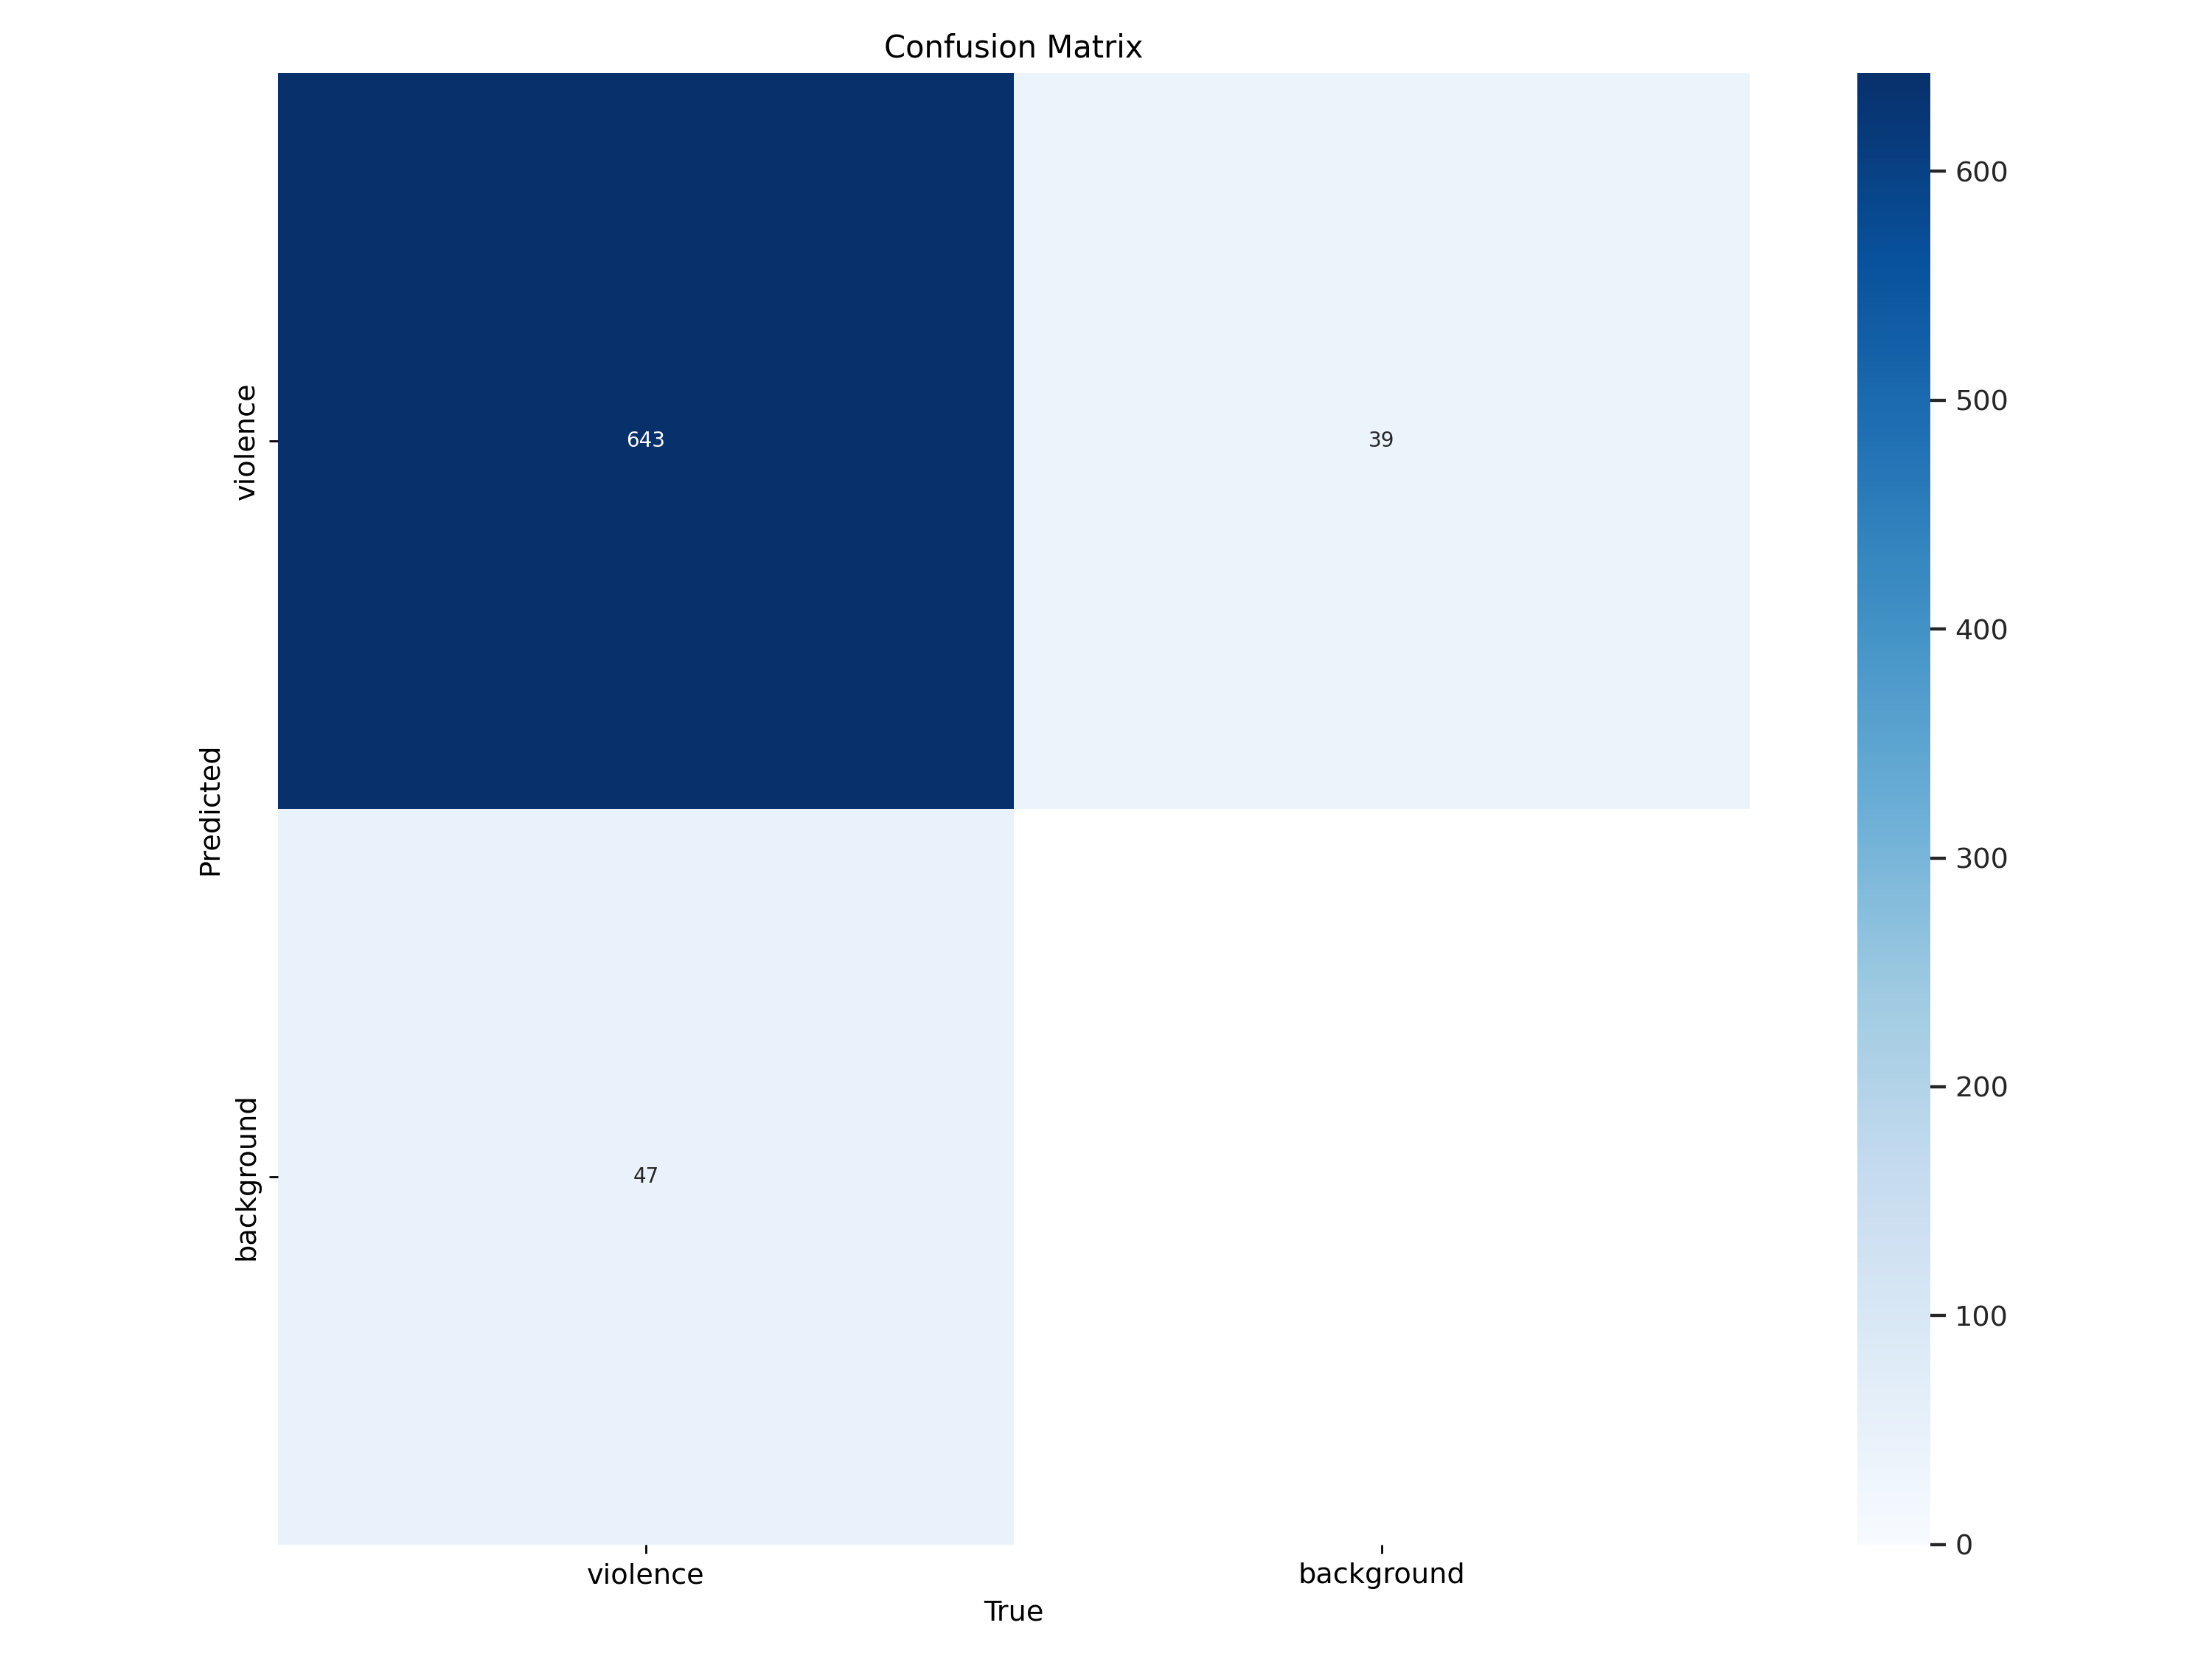

In [10]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

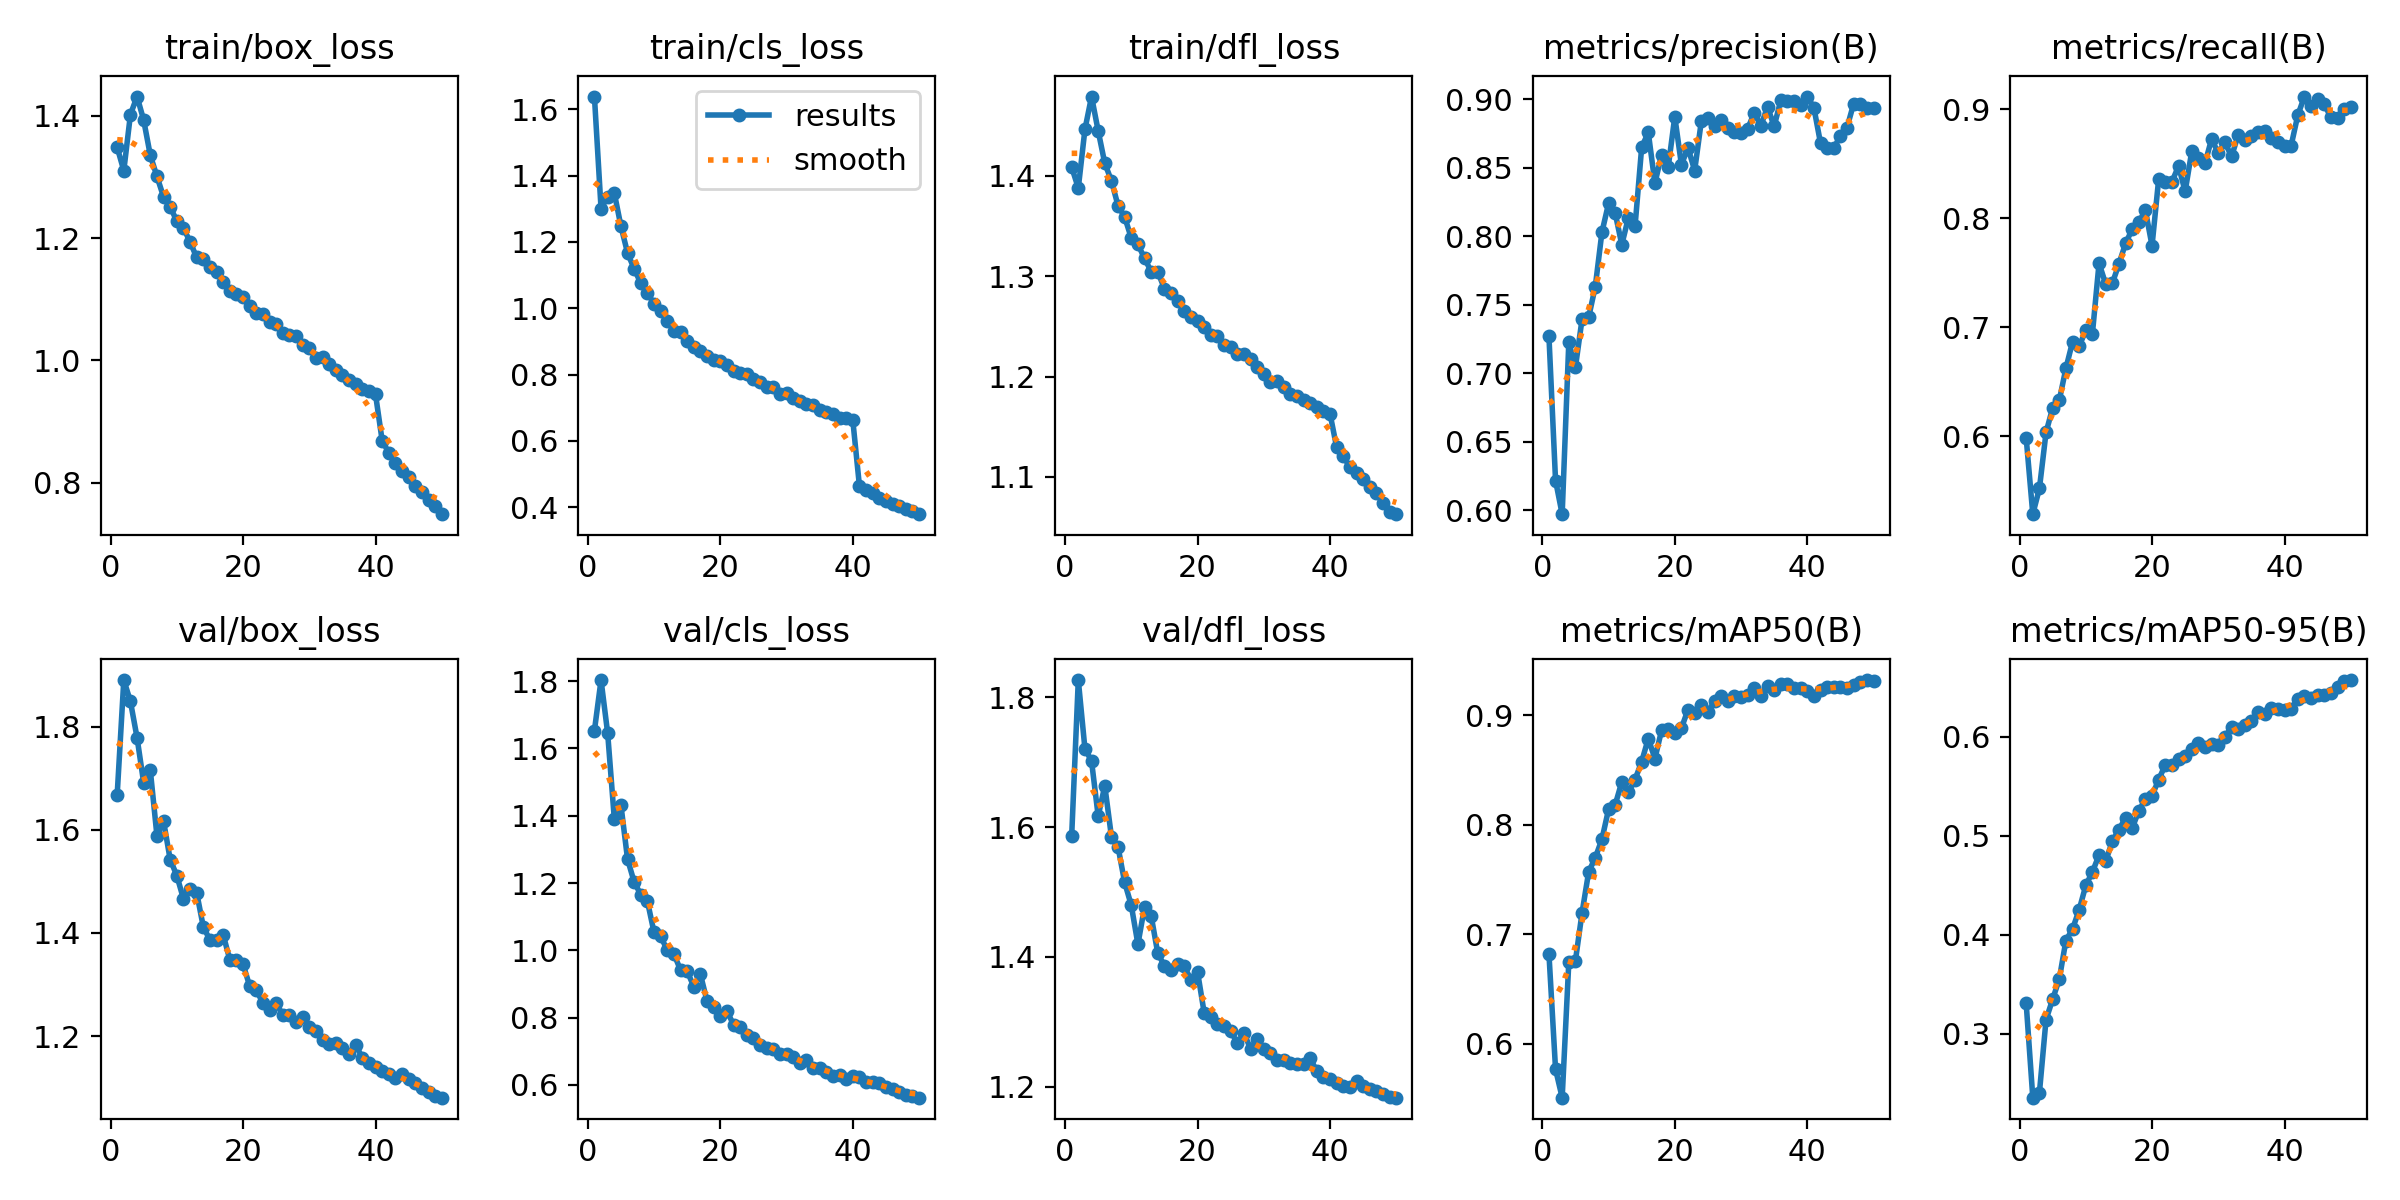

In [11]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [12]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/violence_maksad-3/valid/labels.cache... 700 images, 27 backgrounds, 0 corrupt: 100% 700/700 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 217, len(boxes) = 690. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 44/44 [00:09<00:00,  4.83it/s]
                   all        700        690      0.894      0

In [26]:

!yolo task=detect mode=predict model=yolov8n.pt data=/content/datasets/violence_maksad-3/data.yaml conf=0.2 source={dataset.location}/test/images save_txt=true save_conf=true


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/15 /content/datasets/violence_maksad-3/test/images/image1.jpg: 640x640 3 persons, 3 cars, 1 dog, 10.9ms
image 2/15 /content/datasets/violence_maksad-3/test/images/image10.jpg: 640x512 3 persons, 2 cell phones, 70.7ms
image 3/15 /content/datasets/violence_maksad-3/test/images/image11.jpg: 640x448 1 person, 1 cell phone, 69.4ms
image 4/15 /content/datasets/violence_maksad-3/test/images/image12.jpg: 640x512 2 persons, 7.5ms
image 5/15 /content/datasets/violence_maksad-3/test/images/image13.jpg: 352x640 2 persons, 70.2ms
image 6/15 /content/datasets/violence_maksad-3/test/images/image14.jpg: 640x640 3 persons, 8.3ms
image 7/15 /content/datasets/violence_maksad-3/test/images/image15.jpg: 480x640 3 persons, 67.5ms
image 8/15 /content/datasets/violence_maksad-3/test/images/ima

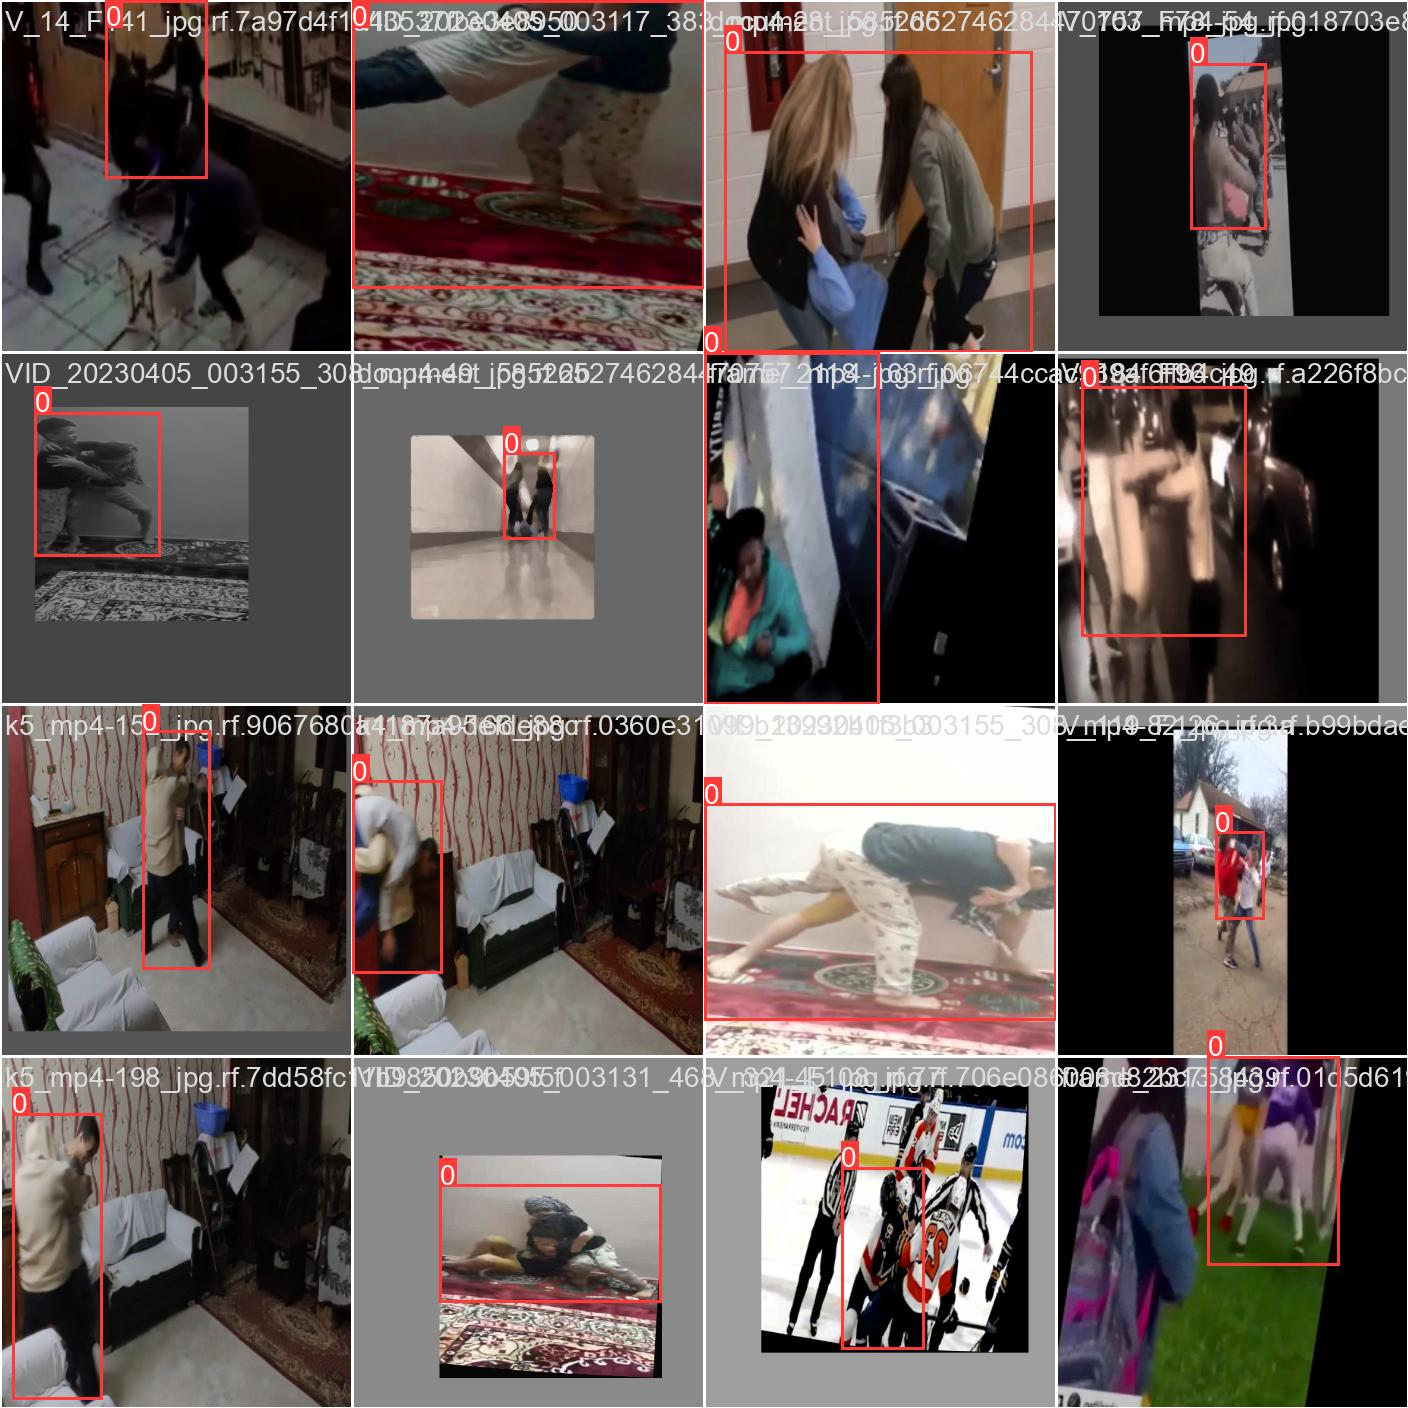

In [30]:
Image(filename=f'/content/runs/detect/train/train_batch37960.jpg', width=600)

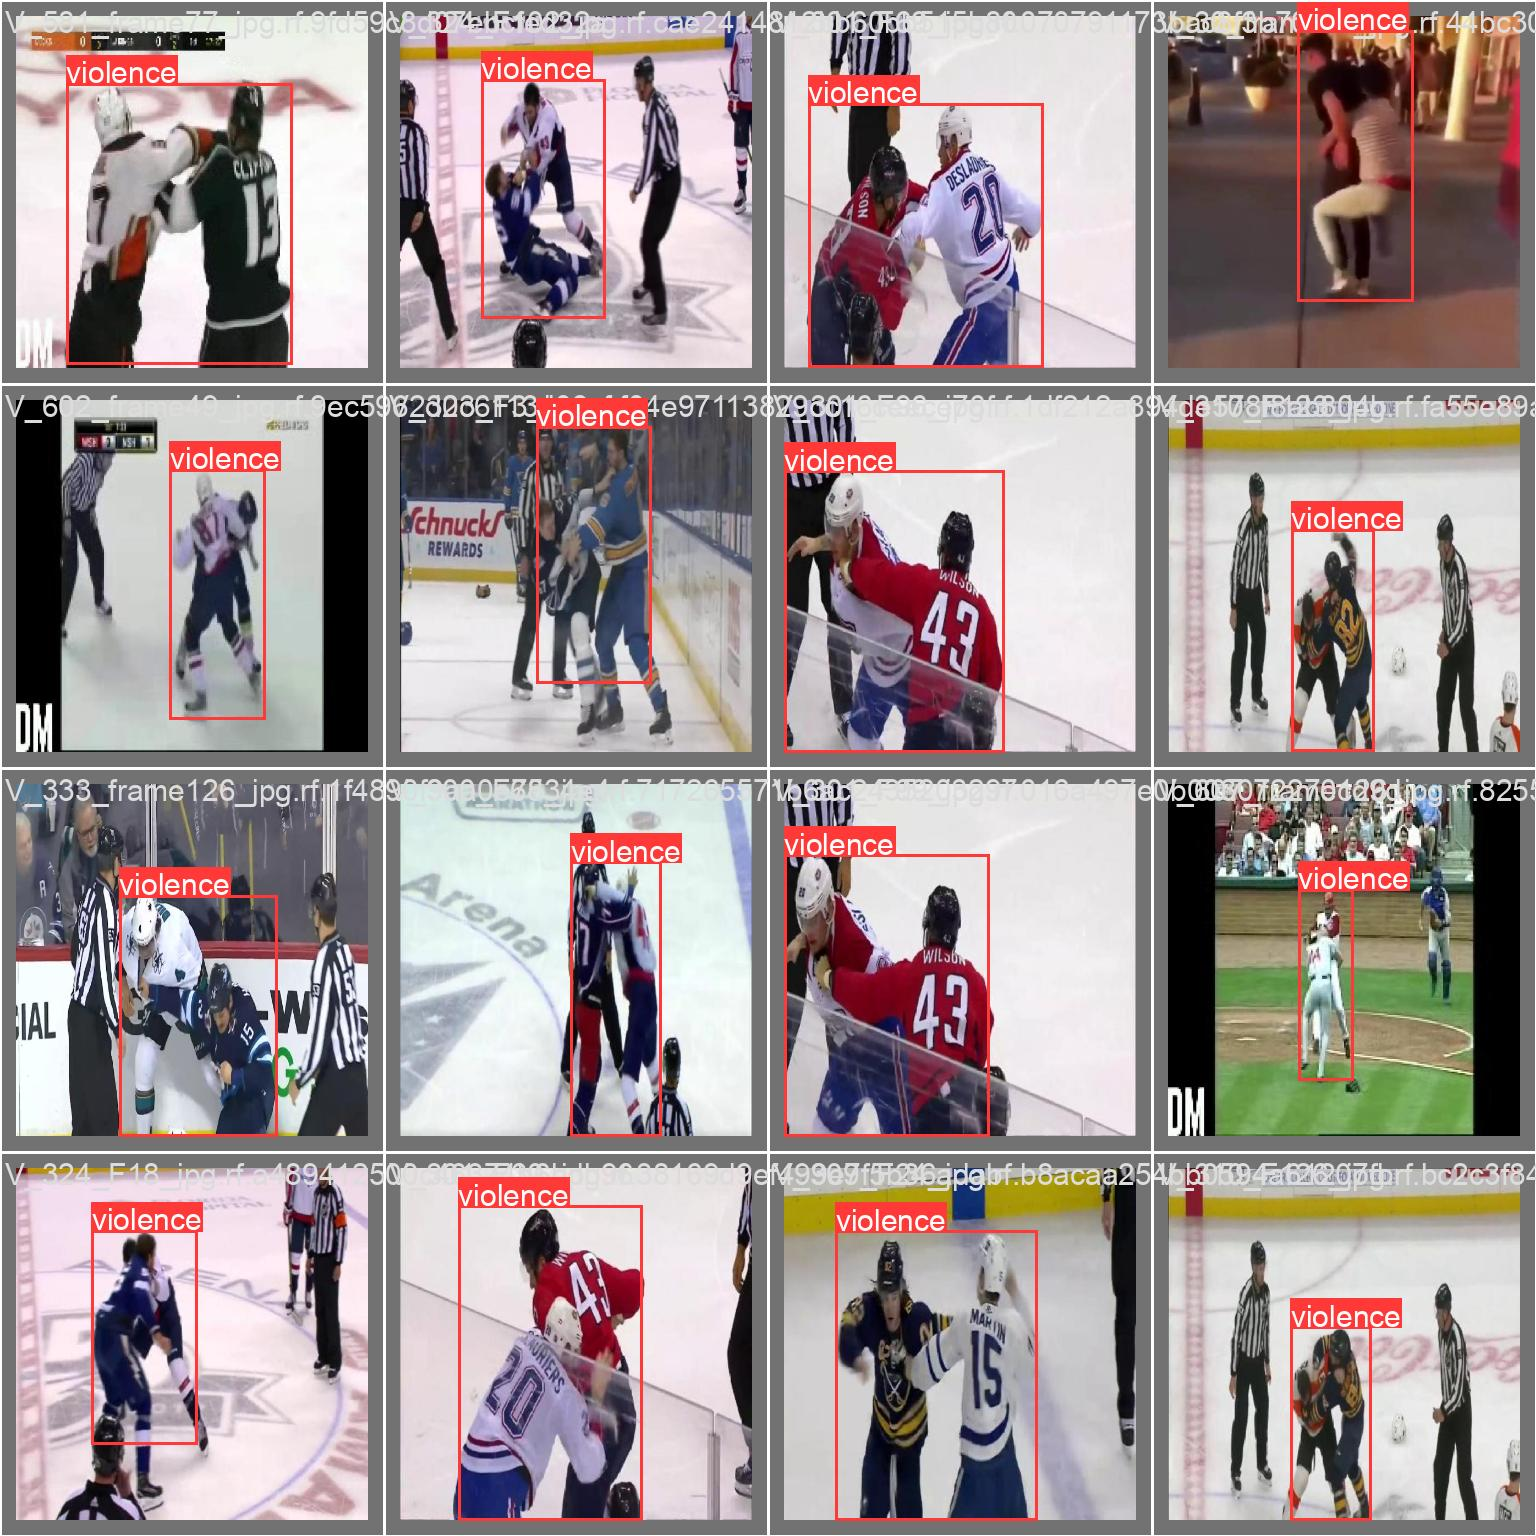

In [27]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/val/val_batch1_labels.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

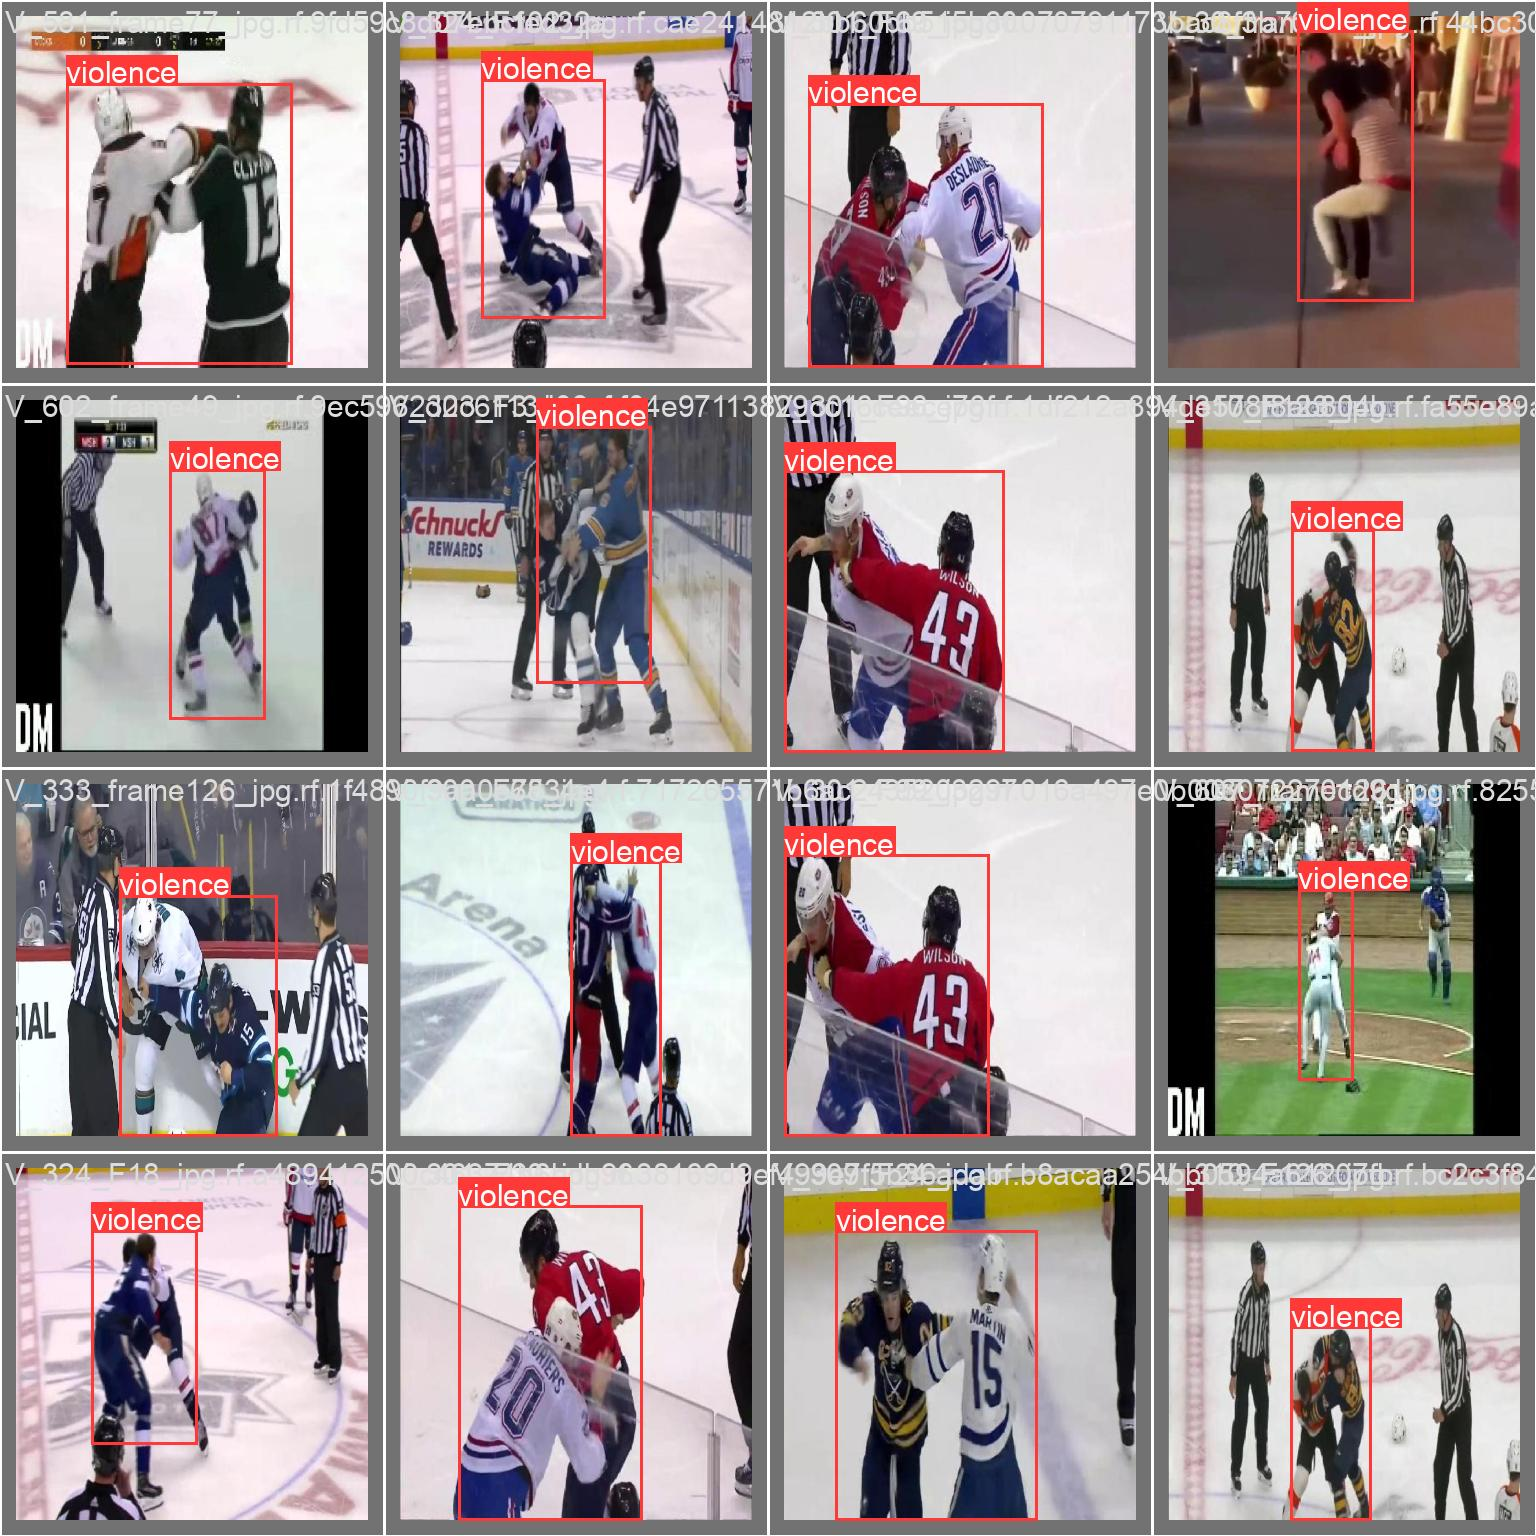

In [28]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/val/val_batch1_labels.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

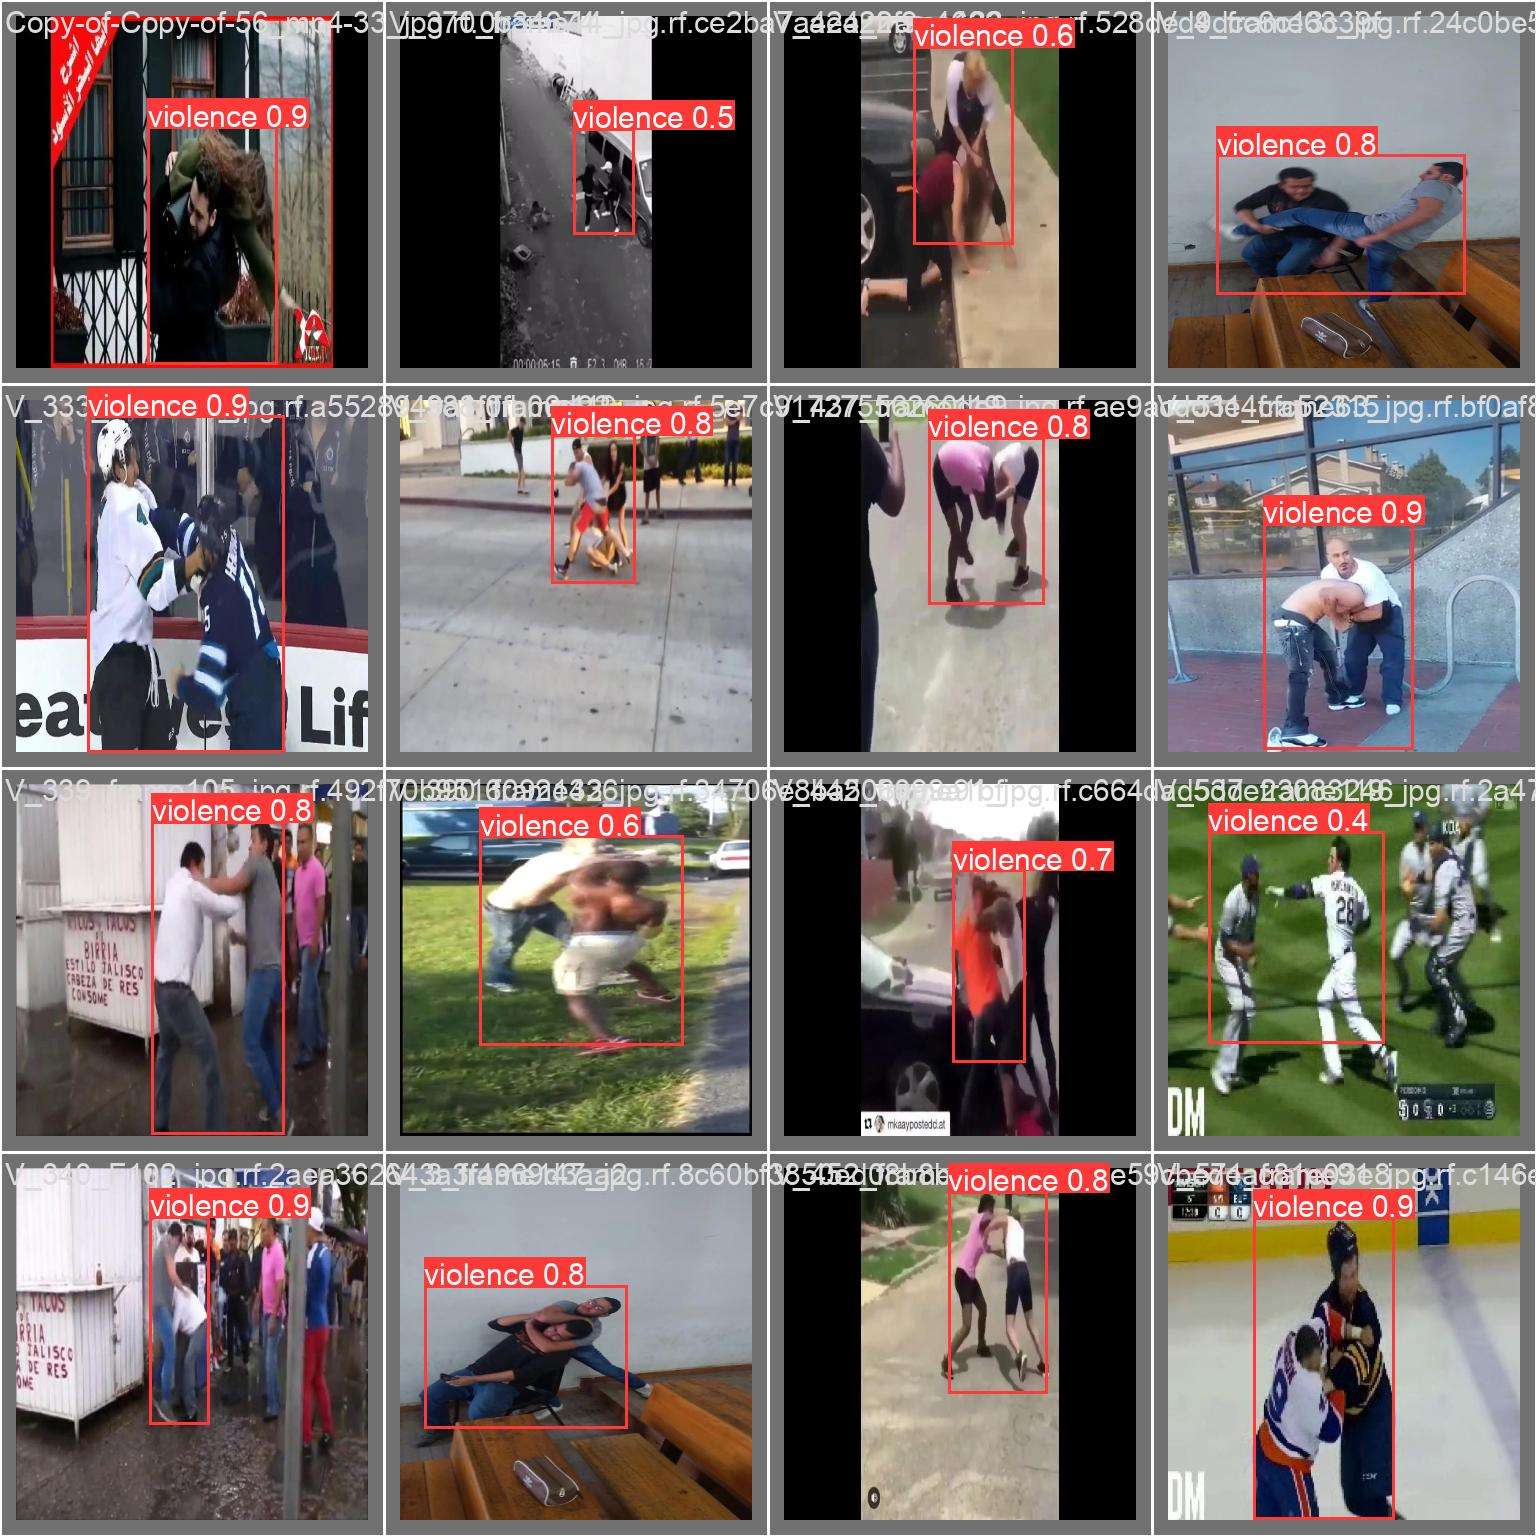

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/train/val_batch0_pred.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

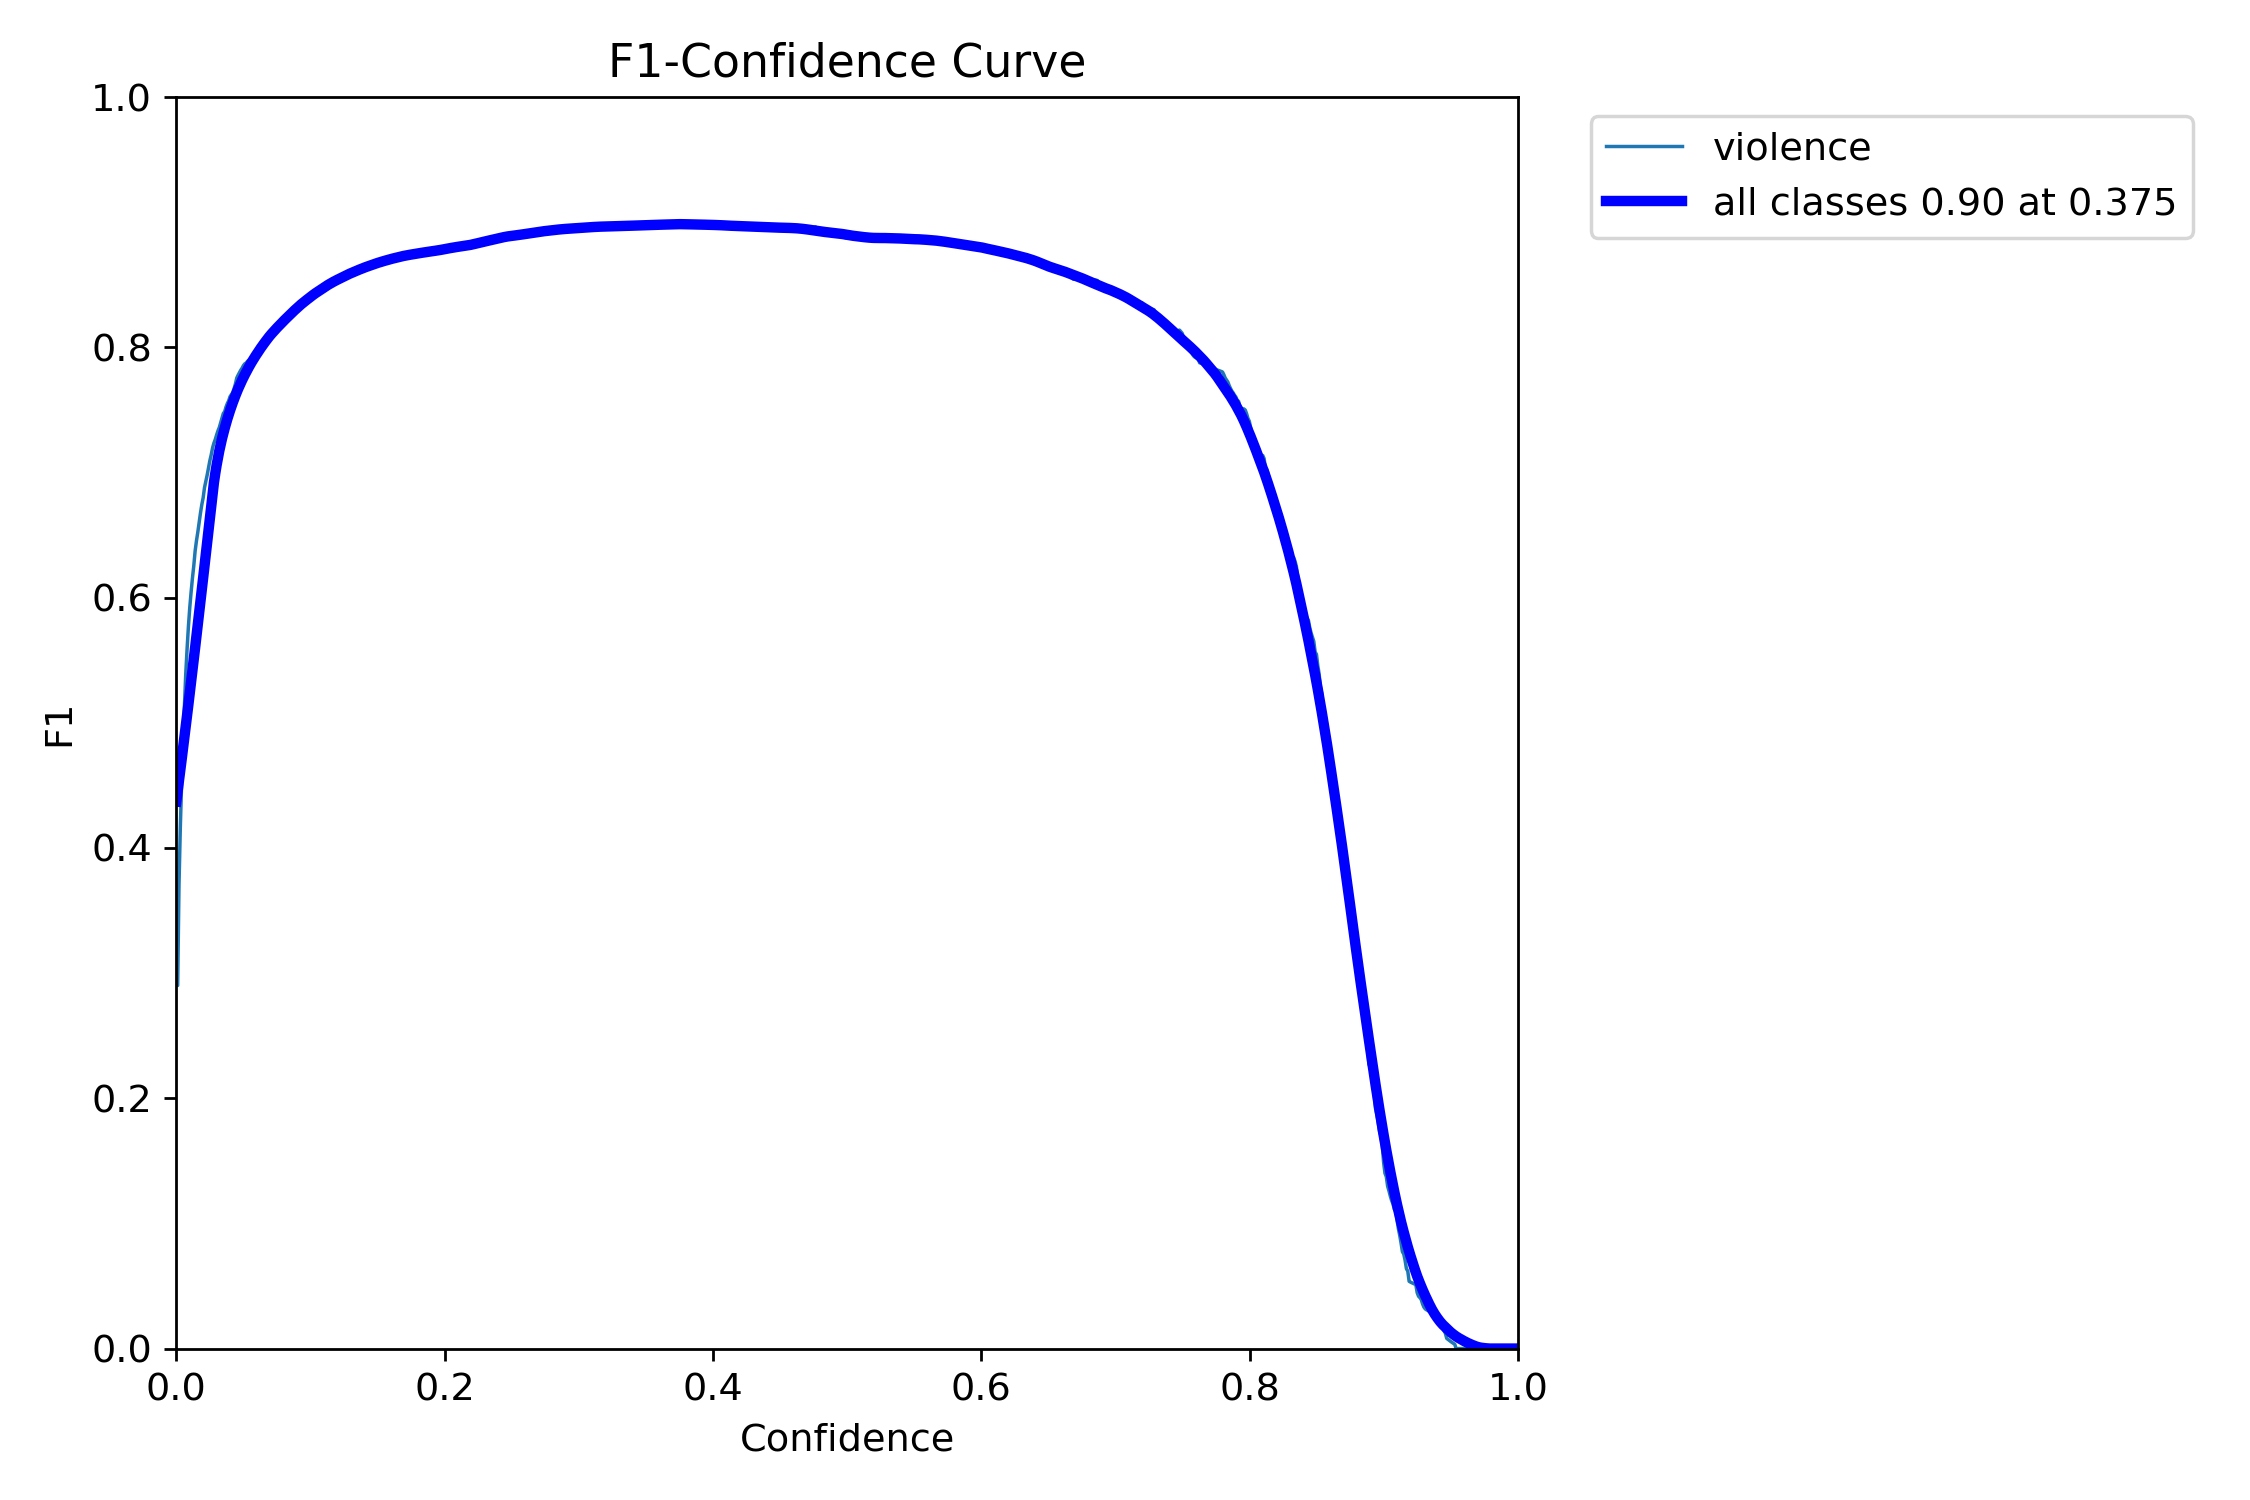

In [17]:
Image(filename=f'/content/runs/detect/train/F1_curve.png', width=600)

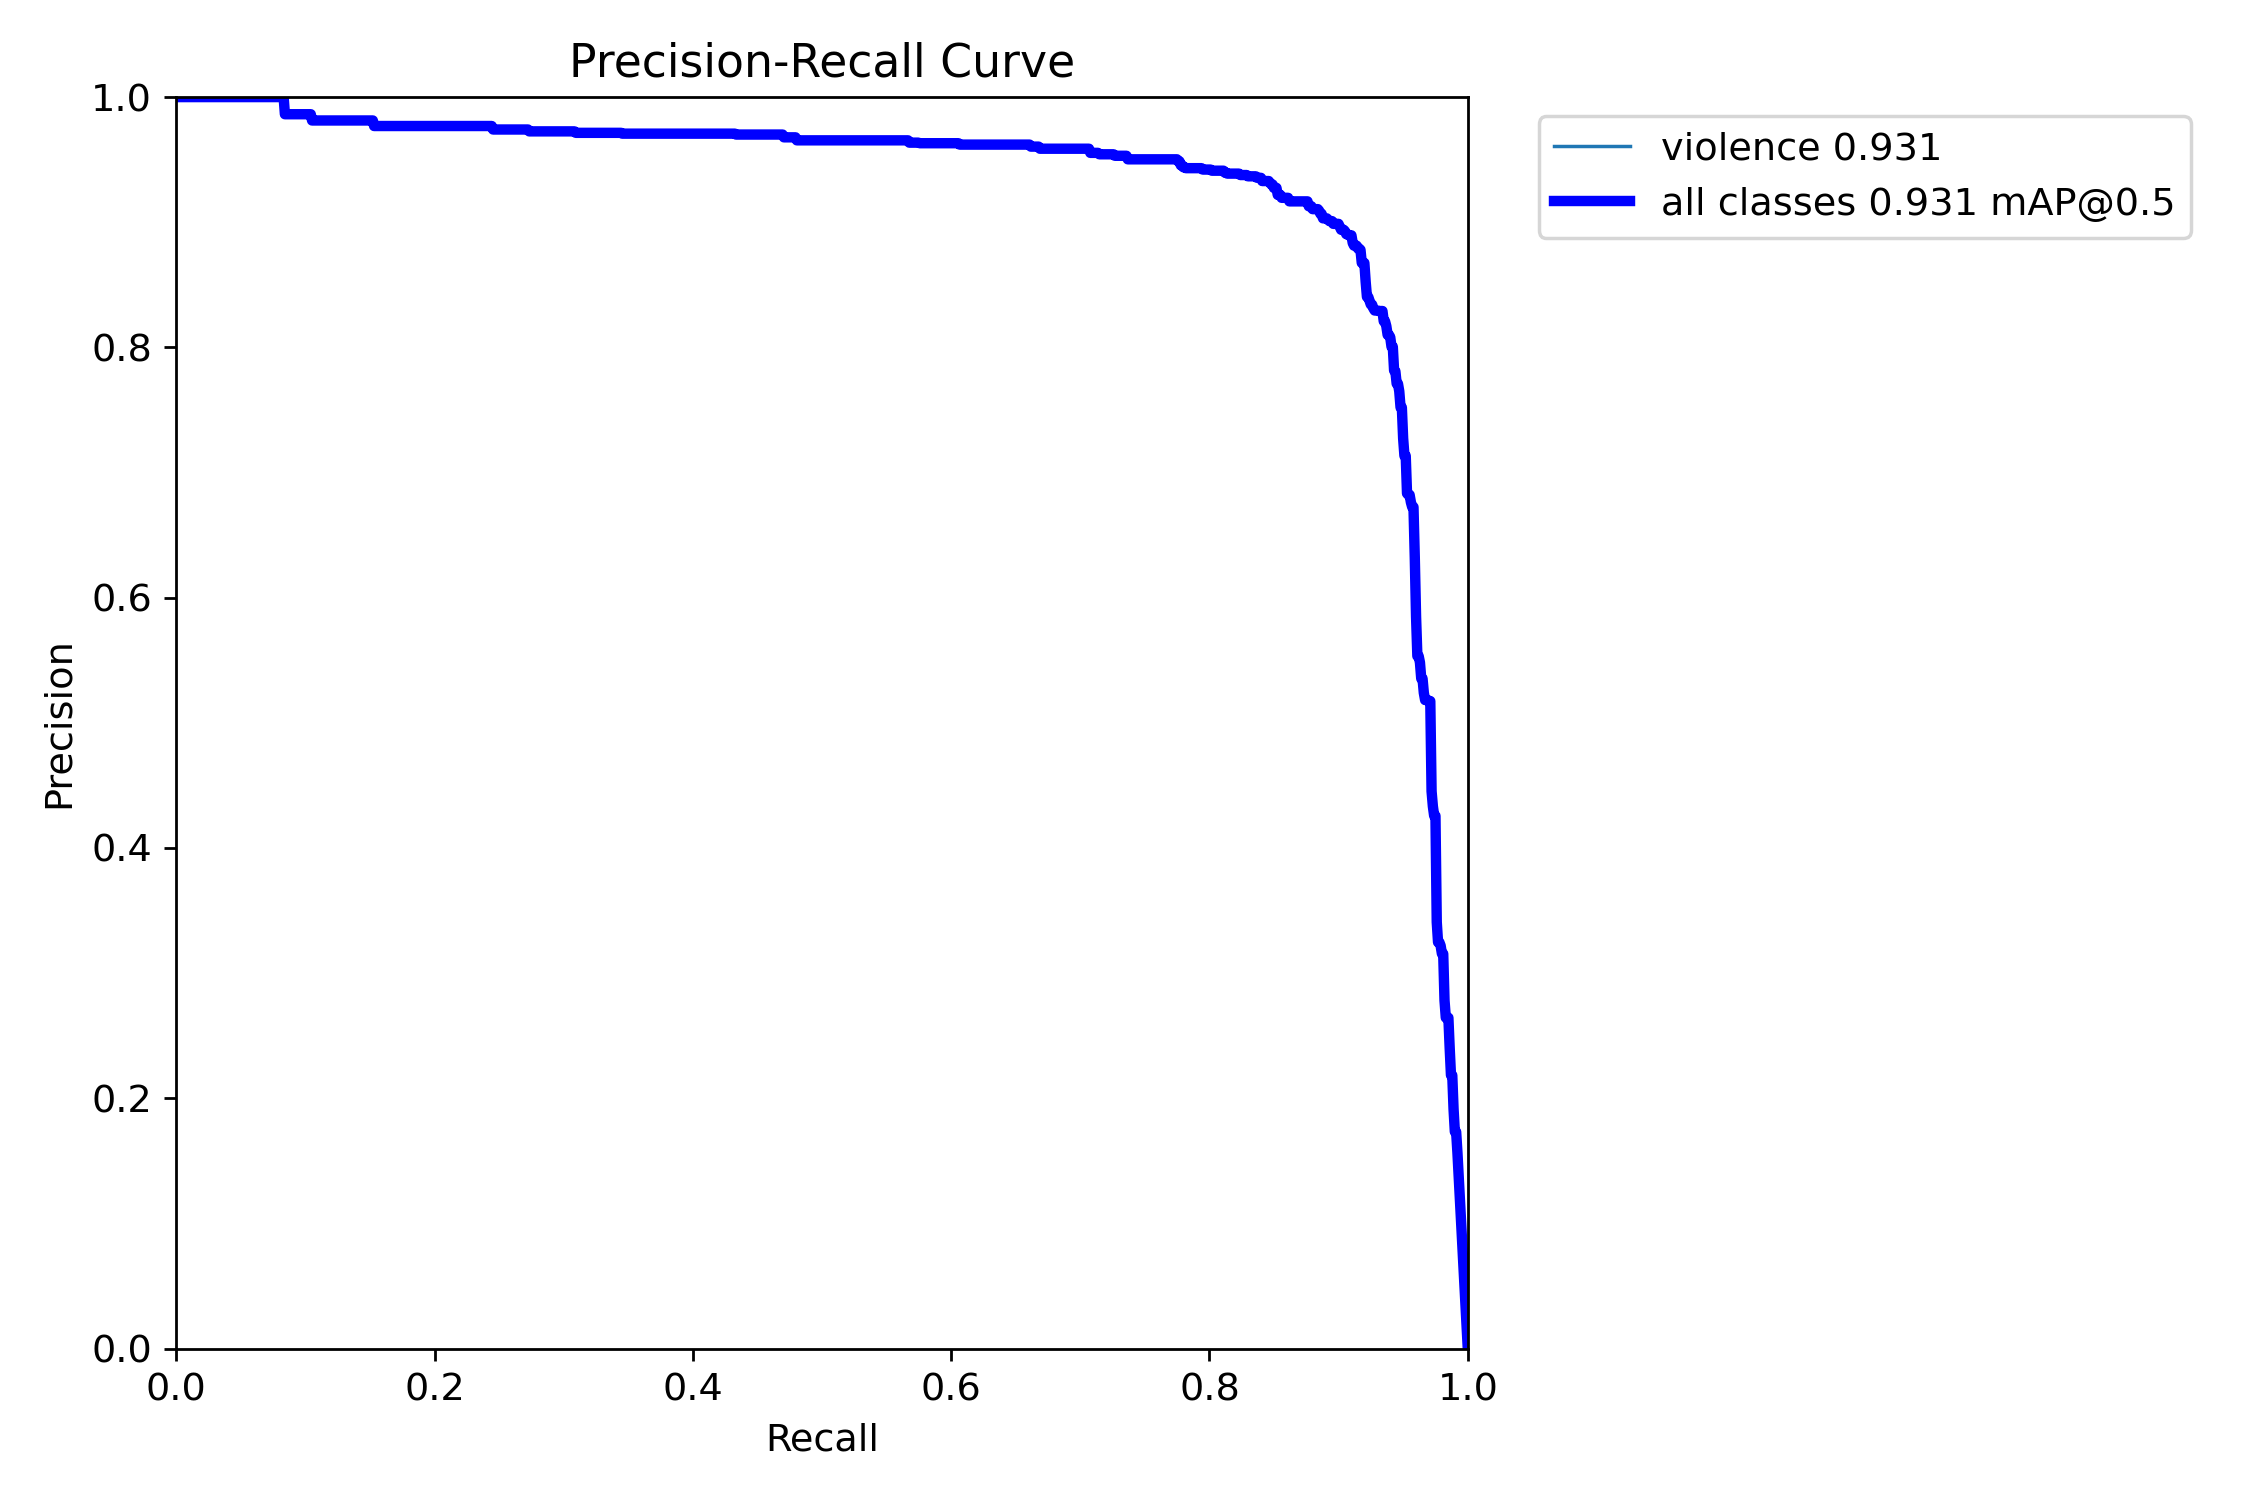

In [18]:
Image(filename=f'/content/runs/detect/train/PR_curve.png', width=600)

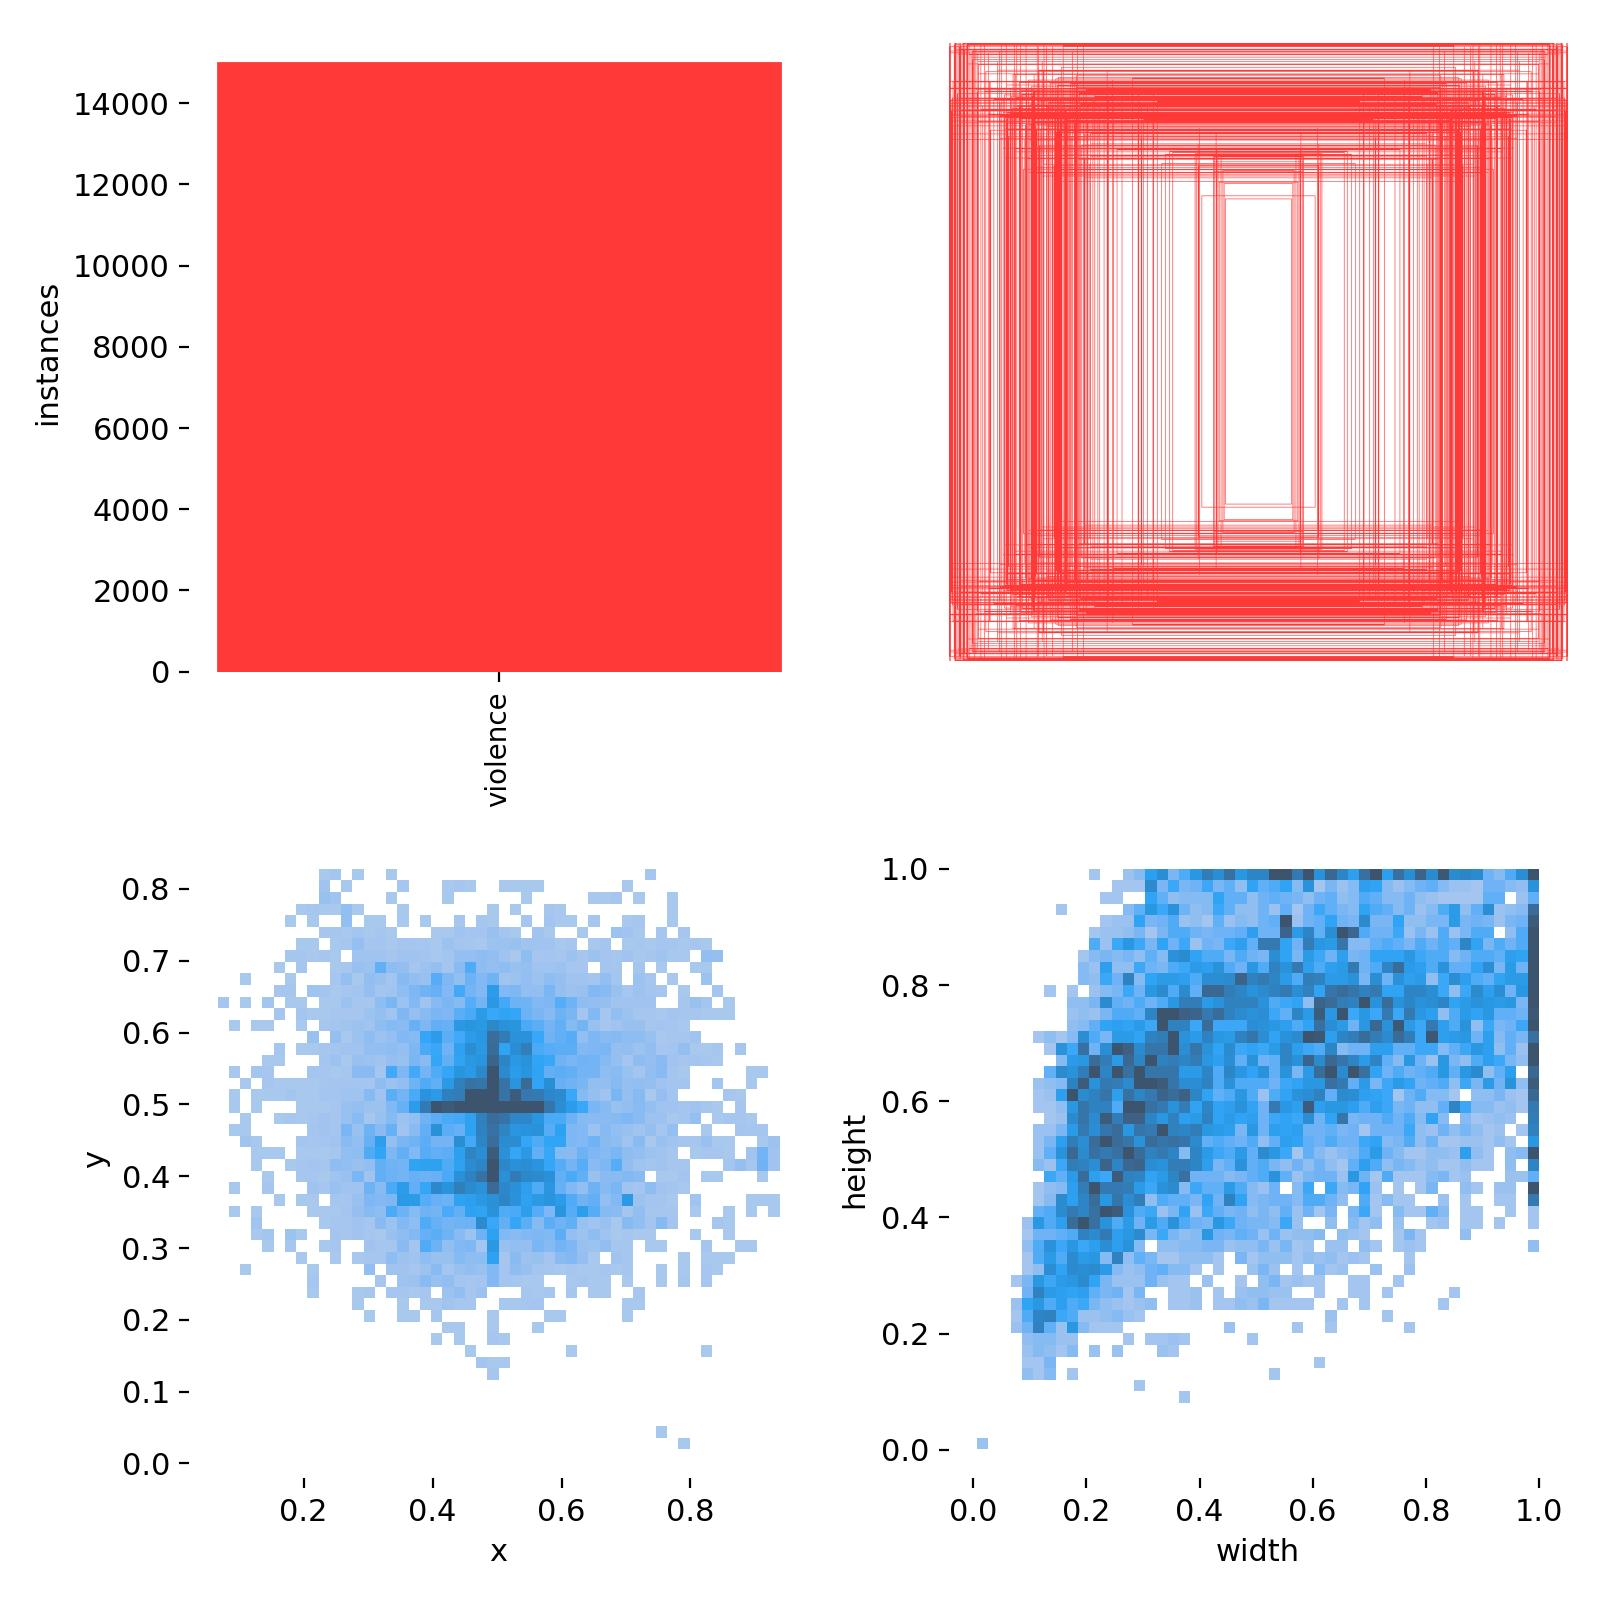

In [19]:
Image(filename=f'/content/runs/detect/train/labels.jpg', width=600)

In [20]:
import csv

file_path = '/content/runs/detect/train/results.csv'

# Read and print CSV file
with open(file_path, 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        print(row)

['                  epoch', '         train/box_loss', '         train/cls_loss', '         train/dfl_loss', '   metrics/precision(B)', '      metrics/recall(B)', '       metrics/mAP50(B)', '    metrics/mAP50-95(B)', '           val/box_loss', '           val/cls_loss', '           val/dfl_loss', '                 lr/pg0', '                 lr/pg1', '                 lr/pg2']
['                      1', '                 1.3483', '                 1.6383', '                 1.4088', '                0.72714', '                0.59855', '                0.68226', '                0.33072', '                 1.6682', '                 1.6529', '                 1.5865', '              0.0033298', '              0.0033298', '              0.0033298']
['                      2', '                 1.3101', '                 1.3007', '                 1.3879', '                0.62161', '                0.52854', '                0.57652', '                0.23533', '                 1.8908'

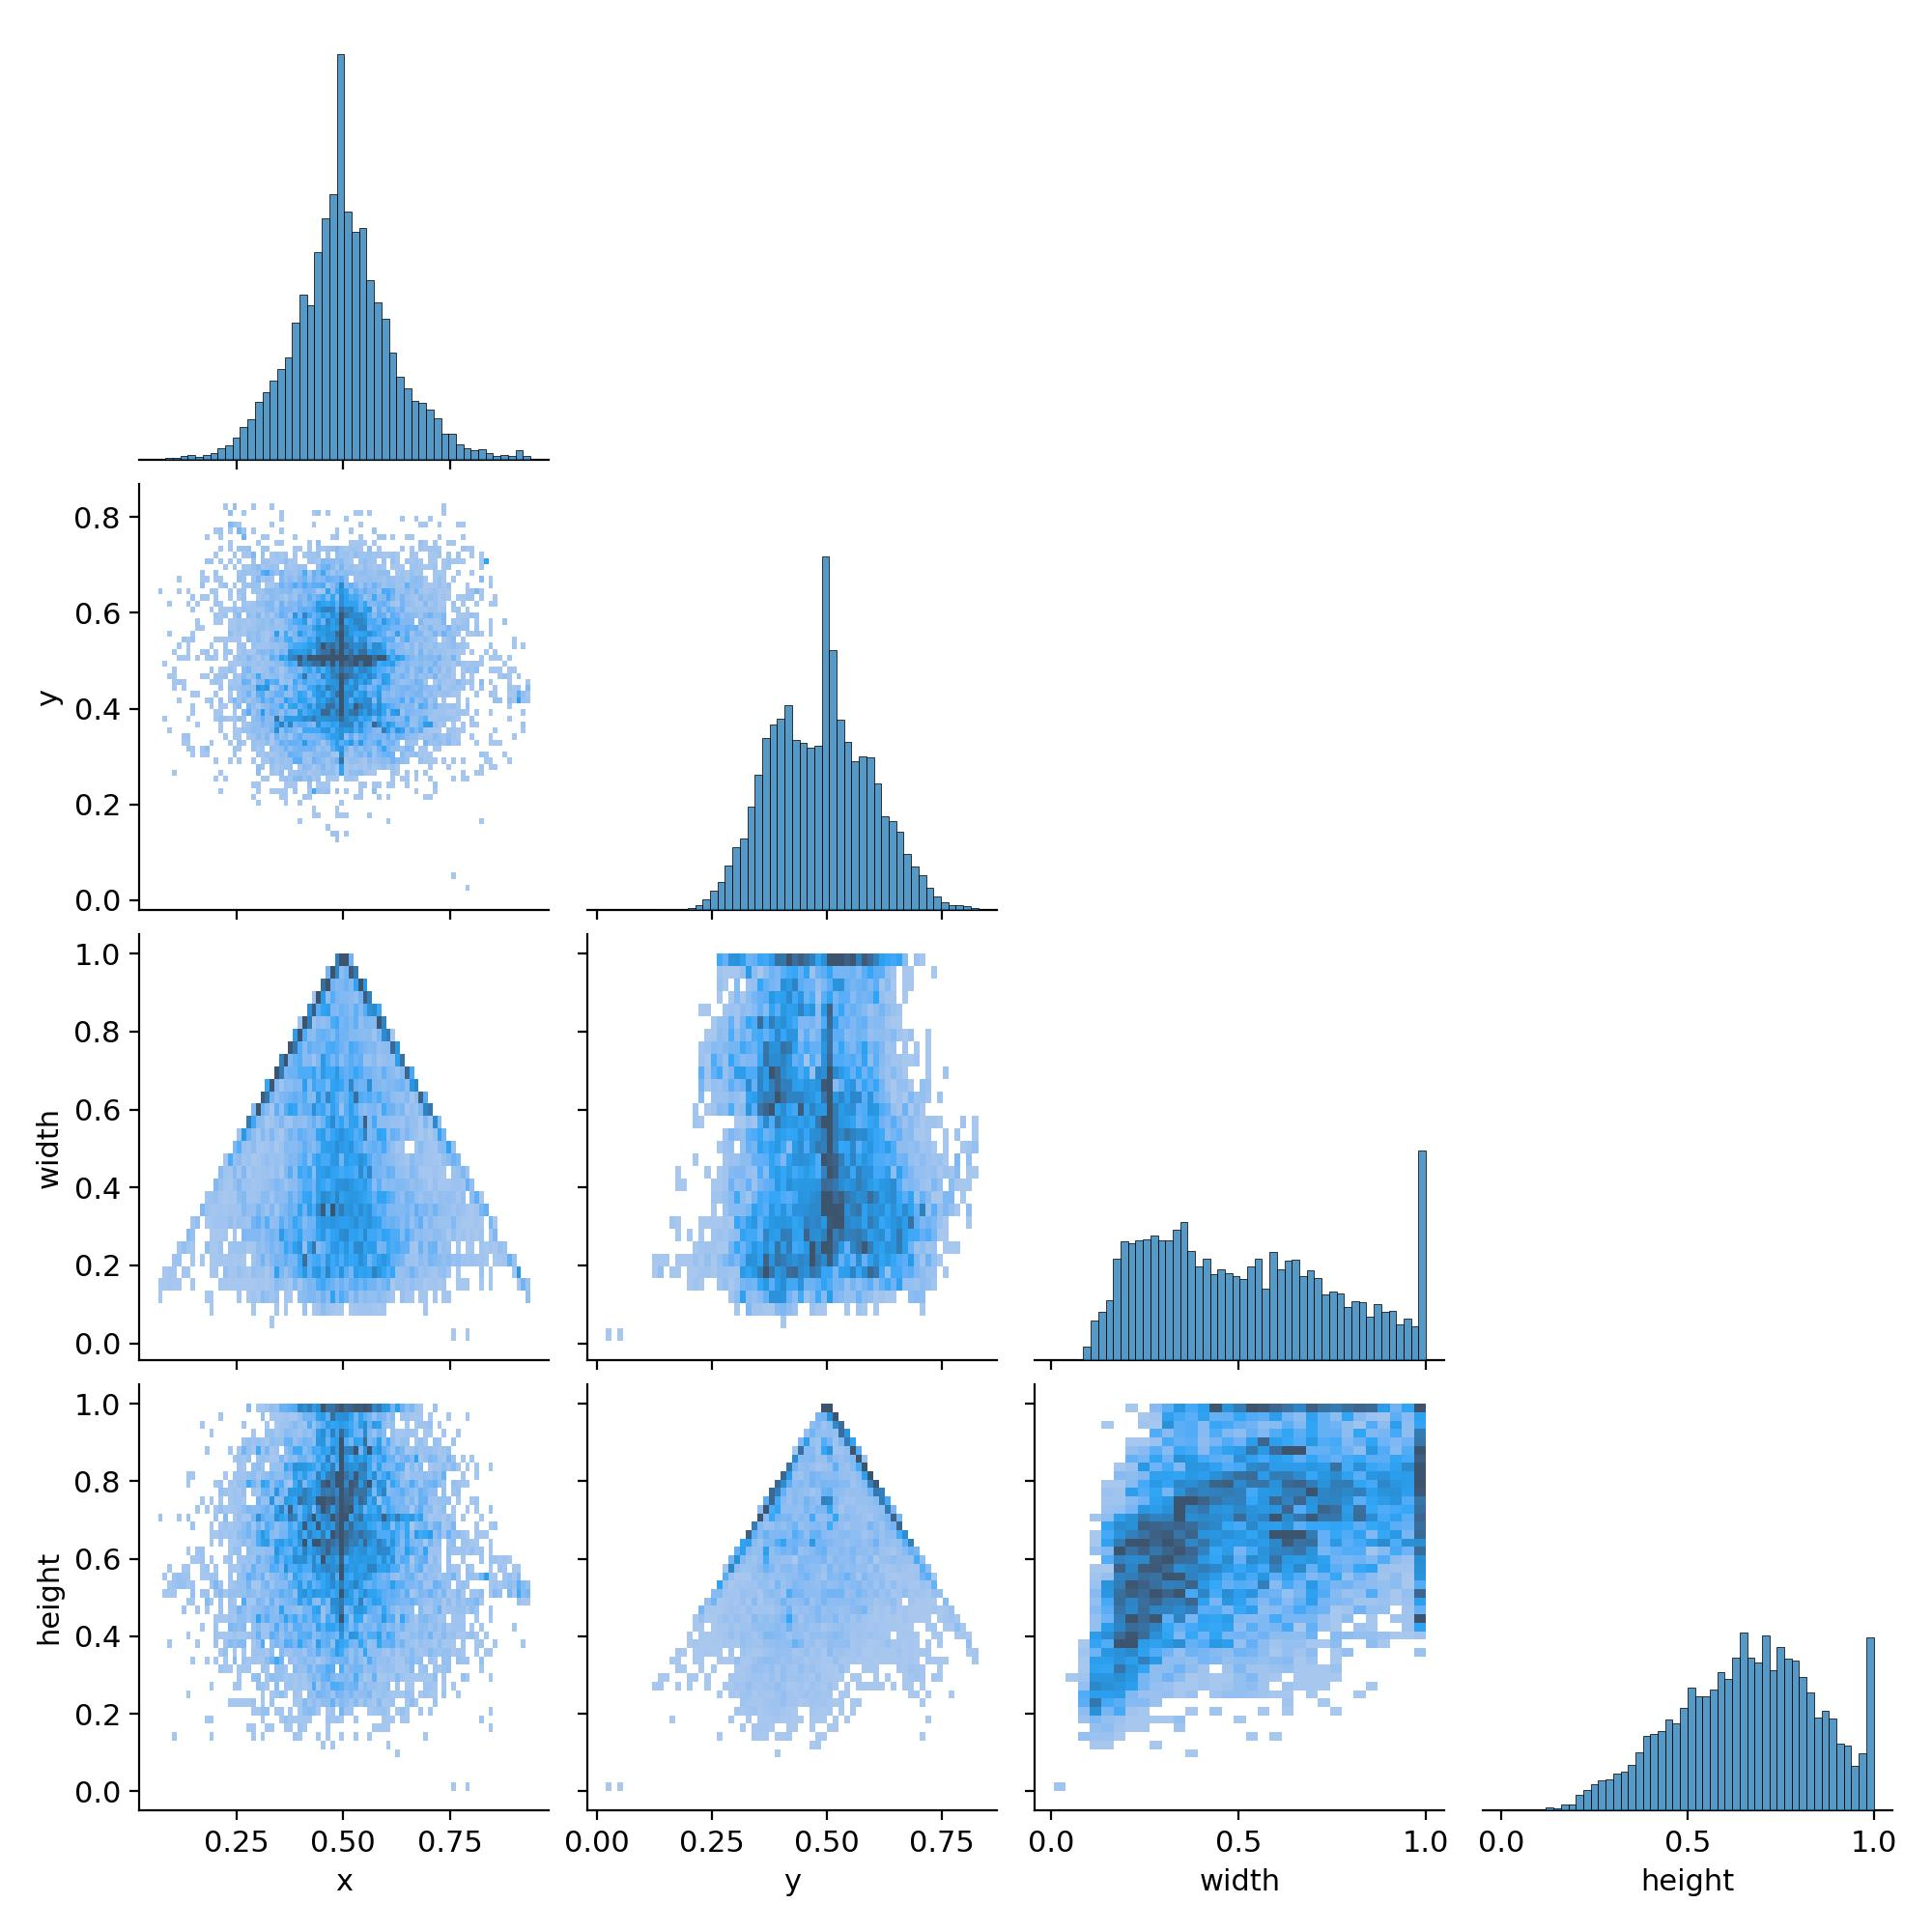

In [21]:
Image(filename=f'/content/runs/detect/train/labels_correlogram.jpg', width=600)